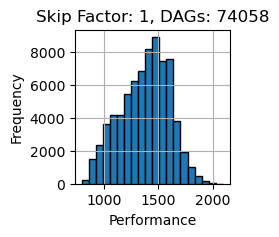

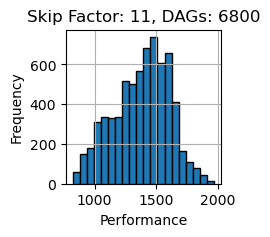

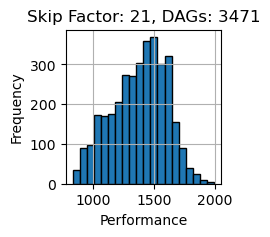

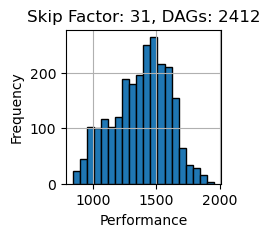

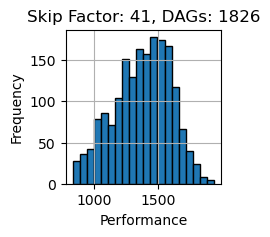

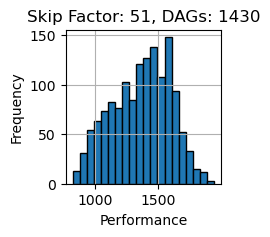

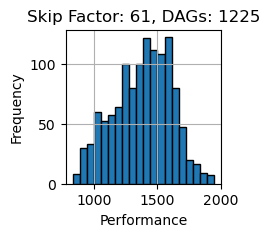

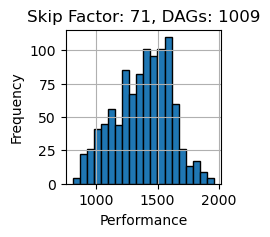

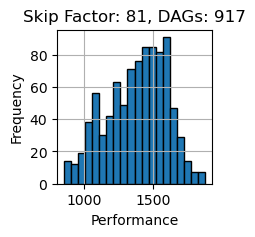

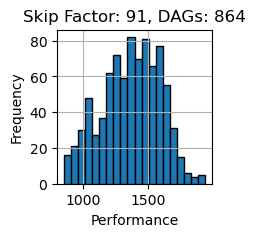

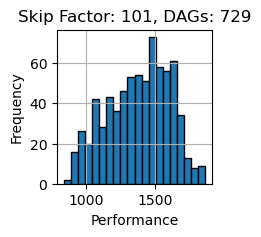

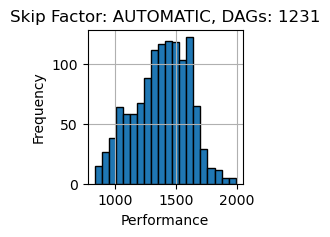

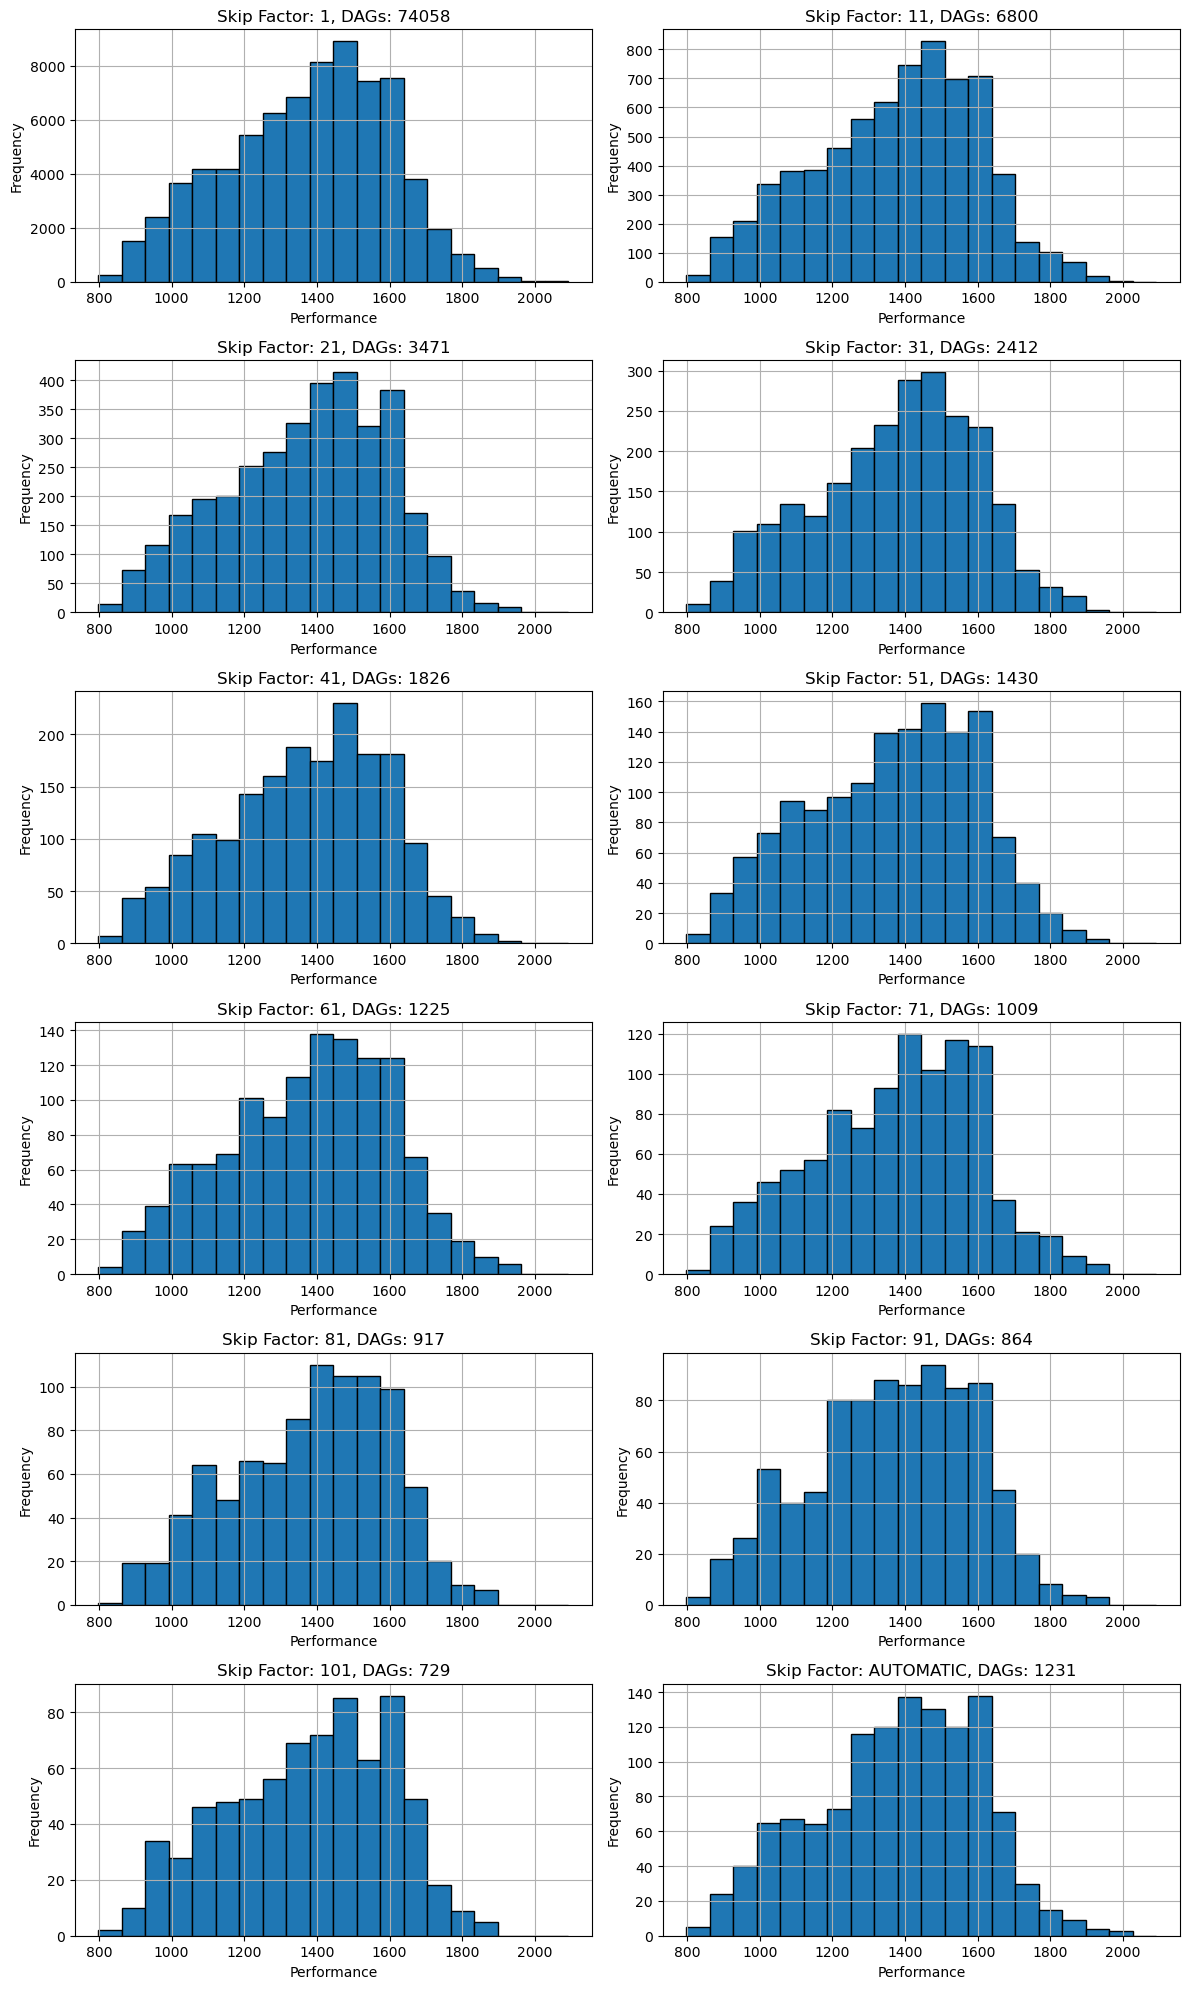

In [30]:
import numpy as np
import math
import matplotlib.pyplot as plt
import sys
sys.path.append('..')
from DAGDatasetGenerator import DAGDatasetGenerator

generator = DAGDatasetGenerator()

# Generate a random adjacency matrix
adj_matrix, density_factor = generator.generate_random_adj_matrix(20, 0.55)

# Parameters for skip factor
min_skip_factor = 1
max_skip_factor = 110
skip_factor_step = 10

# Include the automatic skip factor (0) at the end
skip_factors = list(range(min_skip_factor, max_skip_factor, skip_factor_step)) + [0]

# Initialize list to store performance data for each skip factor
perfs_per_skip_factor = []

# Loop over all skip factors, including automatic mode
for skip_factor in skip_factors:
    all_dags = generator.generate_subset_dags_pure_c(adj_matrix, skip_factor=skip_factor, test_mode=False)
    perfs = []

    # Collect all performance data for the current skip factor
    for dag in all_dags:
        _, perf = generator.evaluate_dag_performance_double_flux_pure_c(dag, adj_matrix, 2, 15)
        perfs.append(perf)

    # Plot histogram for the current skip factor
    plt.figure(figsize=(2, 2))
    plt.hist(perfs, bins=20, edgecolor='black')  # Create histogram
    title = f'Skip Factor: AUTOMATIC' if skip_factor == 0 else f'Skip Factor: {skip_factor}'
    plt.title(f'{title}, DAGs: {len(all_dags)}')
    plt.xlabel('Performance')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

    perfs_per_skip_factor.append((all_dags, perfs))

# Compute global min and max for histogram ranges
global_min, global_max = min(min(perfs) for _, perfs in perfs_per_skip_factor), max(max(perfs) for _, perfs in perfs_per_skip_factor)

# Create subplots for all skip factors
fig, axes = plt.subplots((len(skip_factors) + 1) // 2, 2, figsize=(12, 20))  # Create subplots
axes = axes.flatten()  # Flatten for easier indexing

# Plot histograms in subplots
for i, (skip_factor, (all_dags, perfs)) in enumerate(zip(skip_factors, perfs_per_skip_factor)):
    ax = axes[i]  # Get the correct subplot
    ax.hist(perfs, bins=20, range=(global_min, global_max), edgecolor='black')  # Use global range
    title = f'Skip Factor: AUTOMATIC' if skip_factor == 0 else f'Skip Factor: {skip_factor}'
    ax.set_title(f'{title}, DAGs: {len(all_dags)}')
    ax.set_xlabel('Performance')
    ax.set_ylabel('Frequency')
    ax.grid(True)

# Adjust layout and display the combined plot
fig.tight_layout()
plt.show()


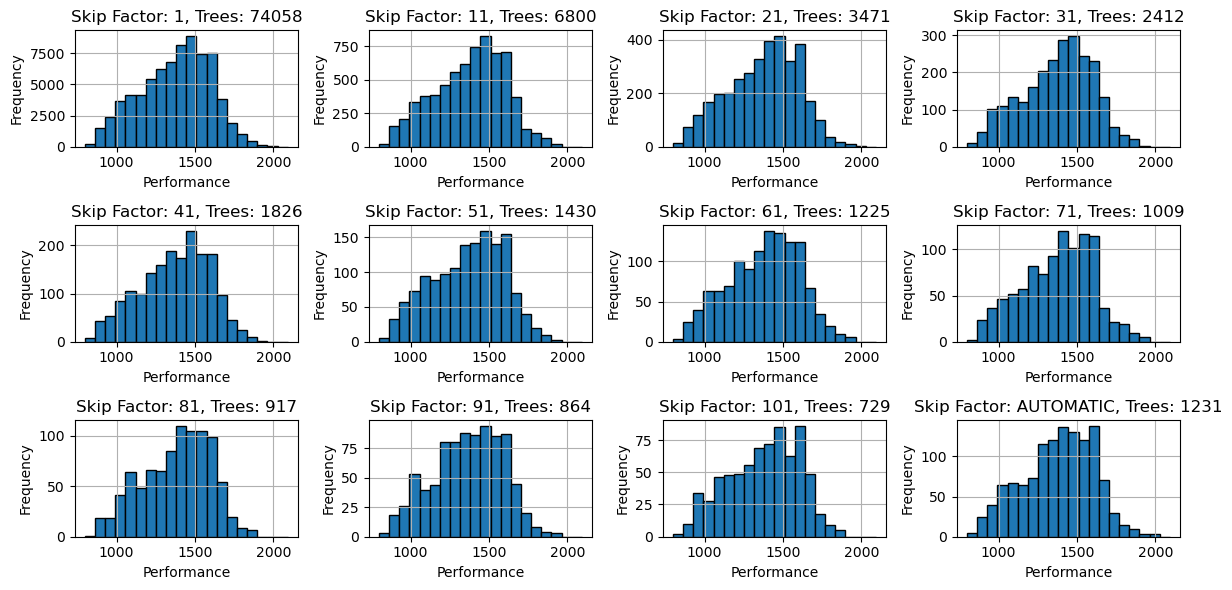

node_count = 20, edge_count = 34, total_comb = 1855967520, skip_factor = 61.865584


In [ ]:
# Compute global min and max for histogram ranges
global_min, global_max = min(min(perfs) for _, perfs in perfs_per_skip_factor), max(max(perfs) for _, perfs in perfs_per_skip_factor)

# Create subplots for all skip factors
fig, axes = plt.subplots((len(skip_factors) + 1) // 4, 4, figsize=(12, 6))  # Create subplots
axes = axes.flatten()  # Flatten for easier indexing

# Plot histograms in subplots
for i, (skip_factor, (all_dags, perfs)) in enumerate(zip(skip_factors, perfs_per_skip_factor)):
    ax = axes[i]  # Get the correct subplot
    ax.hist(perfs, bins=20, range=(global_min, global_max), edgecolor='black')  # Use global range
    title = f'Skip Factor: AUTO' if skip_factor == 0 else f'Skip Factor: {skip_factor}'
    ax.set_title(f'{title}, Trees: {len(all_dags)}')
    ax.set_xlabel('Performance')
    ax.set_ylabel('Frequency')
    ax.grid(True)

# Adjust layout and display the combined plot
fig.tight_layout()
plt.show()

node_count = len(adj_matrix[0])
edge_count = 0

for i in range(0, node_count):
    for j in range(i, node_count):
        if adj_matrix[i][j] > 0:
            edge_count += 1

total_comb = int(math.factorial(edge_count) / (math.factorial(node_count - 1)*math.factorial(edge_count - (node_count - 1))))
print(f"node_count = {node_count}, edge_count = {edge_count}, total_comb = {total_comb}, skip_factor = {total_comb/30000000}")

fig.savefig(f"skip_factor_test_density_0.55_{total_comb}_n_edges {edge_count} k_nodes {node_count - 1}.png", dpi=600, bbox_inches='tight')

3.3333333333333334e-08
30000000.0


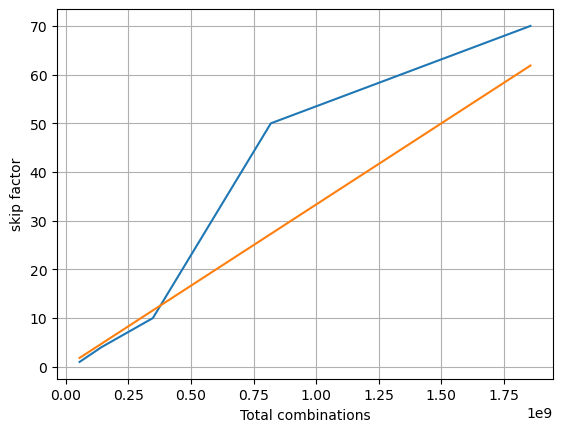

In [2]:
x = [54627300, 141120525, 347373600, 818809200, 1855967520]
y = [1, 4, 10, 50, 70]

m = (y[-1] - y[0]) / (x[-1] - x[0])
m = 1 / 30000000
y_fit = m * np.array(x)
print(m)
print(1/m)

plt.figure()
plt.plot(x, y, x, y_fit)
plt.xlabel("Total combinations")
plt.ylabel("skip factor")
plt.grid(True)
plt.show()

node_count = 20, edge_count = 34, total_comb = 1855967520, skip_factor = 61.865584
